# Introduction

*Problem Definition*
The Birthday Paradox asks the question: what is the probability p(n) that any two people share a birthday given a group of people of size n. More specifically, we all ask how many people are required to have at least a 50% chance that two people share a birthday, that is p(n) > 0.5.

**Structure of the article**
1. uniform / non uniform distribution
2. mathematical derivation / simulation

**Key takeaways**
This a good example to illustrate the following concepts:
1. Law of Total Probability
2. Chain Rule of probability
3. permutation

---
title: "Birthday Paradox"
format:
  html:
    code-fold: true
jupyter: python3
---

In [1]:
import chaospy
from tqdm import tqdm
import numpy as np
import math
import matplotlib.pyplot as plt
# import scipy.special
# from scipy.special import comb
from scipy.stats import norm
from math import comb


# Mathematical Derivation for Uniform birthdays distribution

using the classical approach to probability (geometric approach) is used.


Consider first the probability of the event 'A' that k people do not share a birthday:
$$ P(A) = \frac{365}{365} * \frac{364}{365} * \frac{363}{365} * ... * \frac{365-k+1}{365} = \frac{365 !}{365^k (365-k) !} $$

the same results can be derived using the binomial coefficient to calculate the number of combinations without permutations $V_{n r}$:
$$ V_{n r} =\frac{n !}{(n-k) !}=\frac{365 !}{(365-k) !} $$
and normalising it with the total number of possible combinations $V_t$:
$$ V_t =n^k=365^{k} $$
$$ P(A) =\frac{V_{n r}}{V_t} $$

The probability of the event 'B' that k people share a birthday is the complement of the event 'A':
$$ P(B) =1-P(A) $$


Code and plot:

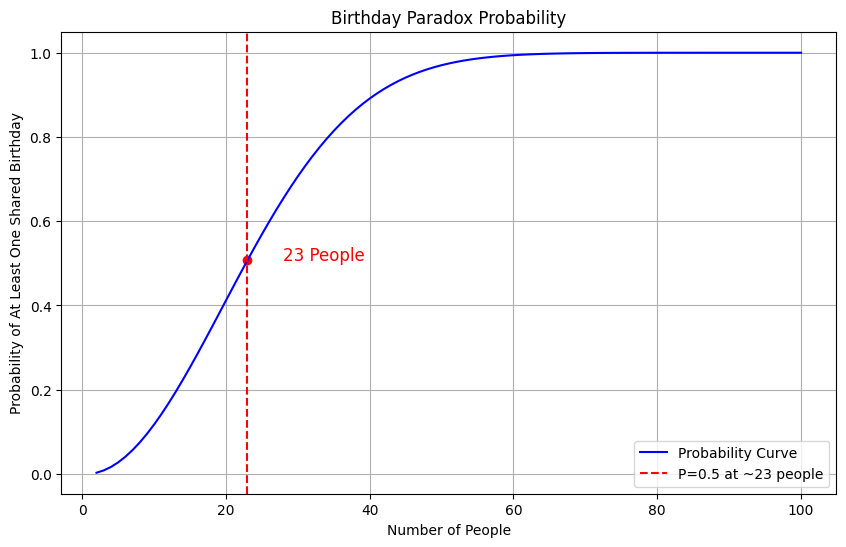

In [2]:
Pb = []
Nperson = 100
time = np.linspace(2, Nperson, Nperson-1)


# Calculate probabilities
for k in range(2,Nperson+1):
    Vnr = int(comb(365, k) * math.factorial(k)) #, exact=True, repetition=True)
    Vt = 365**k
    Pa = Vnr / Vt
    Pb.append( 1 - Pa )



# Find the x-value (number of people) where probability is closest to 0.5
closest_index = np.argmin(np.abs(np.array(Pb) - 0.5))  # Find the closest value
x_at_0_5 = time[closest_index]
y_at_0_5 = Pb[closest_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, Pb, label="Probability Curve", color="blue")
plt.axvline(x=x_at_0_5, color='r', linestyle='--', label=f'P=0.5 at ~{int(x_at_0_5)} people')
plt.scatter([x_at_0_5], [y_at_0_5], color='red')  # Highlight the point

# Annotate the plot with the x-value
plt.text(x_at_0_5 + 5, y_at_0_5, f'{int(x_at_0_5)} People', color='red', fontsize=12, ha='left')

# Add labels, title, legend, and grid
plt.xlabel('Number of People')
plt.ylabel('Probability of At Least One Shared Birthday')
plt.title('Birthday Paradox Probability')
plt.legend()
plt.grid()


plt.show()


and plot results

# Mathematical Derivation for general birthdays distribution


add text here

# Simulation Approach for Uniform birthdays distribution

we first define here a the distribution functions that will be then used in the simulation. Both uniform and non-uniform.

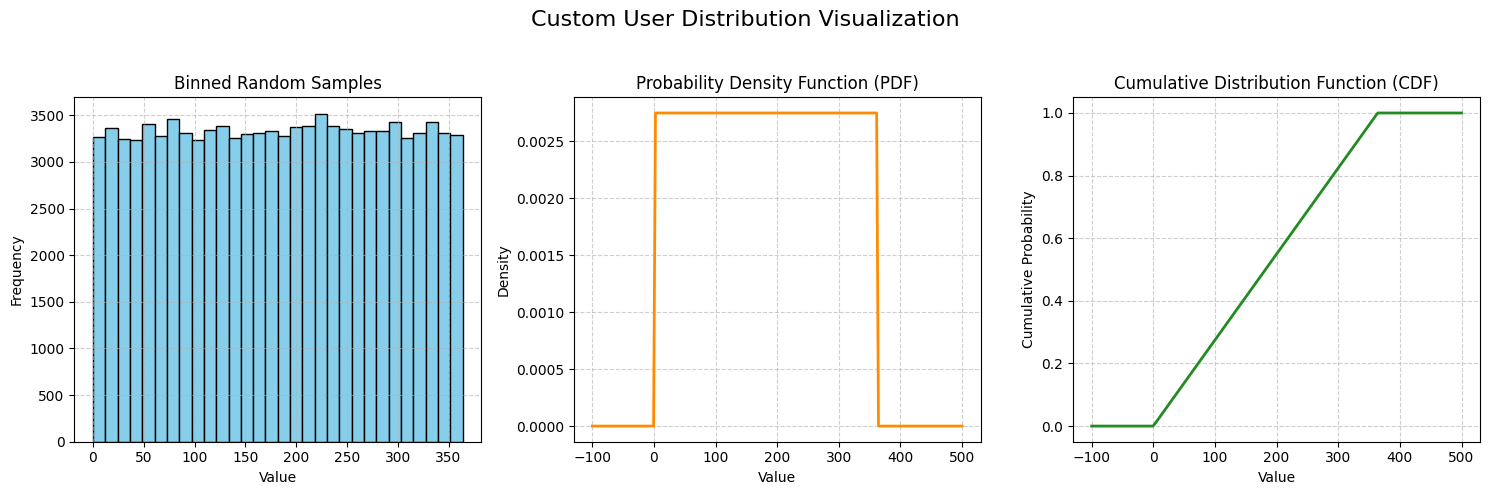

In [3]:
# Define the user distribution functions
def cdf(x_loc, lo, up):
    """Cumulative distribution function."""
    return (x_loc-lo)/(up-lo)

def lower(lo, up):
    """Lower bounds function."""
    return lo

def upper(lo, up):
    """Upper bounds function."""
    return up

# Create the UserDistribution
user_distribution = chaospy.UserDistribution(
    cdf=cdf, lower=lower, upper=upper, parameters=dict(lo=0, up=364))




# Set up subplots with a common title and tight layout
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Custom User Distribution Visualization", fontsize=16)

# Subplot 1: Histogram of random samples
axs[0].set_title("Binned Random Samples", fontsize=12)
axs[0].hist(user_distribution.sample(100000), bins=30, color="skyblue", edgecolor="black")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Probability Density Function (PDF)
x_loc = np.linspace(-100, 500, 200)
axs[1].set_title("Probability Density Function (PDF)", fontsize=12)
axs[1].plot(x_loc, user_distribution.pdf(x_loc), color="darkorange", lw=2)
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Density")
axs[1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Cumulative Distribution Function (CDF)
axs[2].set_title("Cumulative Distribution Function (CDF)", fontsize=12)
axs[2].plot(x_loc, user_distribution.cdf(x_loc), color="forestgreen", lw=2)
axs[2].set_xlabel("Value")
axs[2].set_ylabel("Cumulative Probability")
axs[2].grid(True, linestyle="--", alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Simulation of uniform distribution

100%|██████████| 99/99 [00:00<00:00, 107.45it/s]


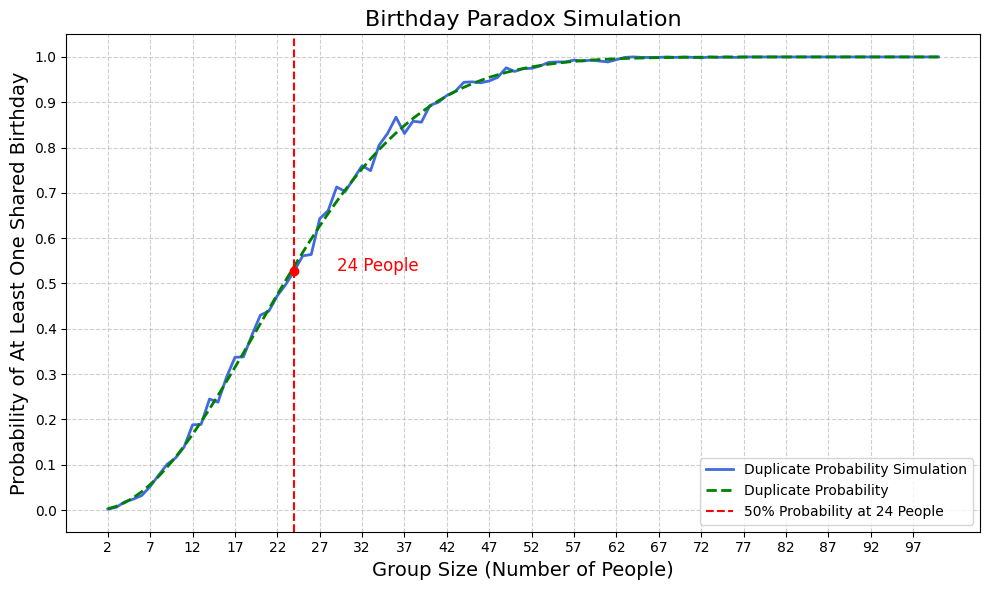

In [4]:
iteration = 1000
Nperson = 100

duplicate_rate = []
# Simulate the Birthday Paradox for group sizes 2 to 99
for iGroupSize in tqdm(range(2, Nperson+1)):
    duplicates_counter = 0
    for i in range(iteration):
        birthdays = np.random.randint(365, size=iGroupSize)  # Randomize group birthdays (0-364)
        # birthdays = np.clip(np.random.normal(180, 150, size=iGroupSize), 0, 364).astype(int)  # Randomize group birthdays (0-364)
        
        
        uniques, counts = np.unique(birthdays, return_counts=True)  # Unique birthdays and their counts
        duplicates = uniques[counts > 1]  # Find duplicate birthdays
        duplicates_counter += np.size(duplicates) > 0  # Count if duplicates exist

    duplicate_rate.append(duplicates_counter / iteration)  # Probability of a duplicate in this group size



# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, Nperson+1), duplicate_rate, color='royalblue', lw=2, label="Duplicate Probability Simulation")
plt.plot(range(2, Nperson+1), Pb, color='green', linestyle='--', lw=2, label="Duplicate Probability")

# Highlight where the probability exceeds 50%
threshold_x = np.argmax(np.array(duplicate_rate) > 0.5) + 2  # Find the group size where P > 0.5
threshold_y = duplicate_rate[threshold_x - 2]  # Corresponding probability

plt.axvline(x=threshold_x, color='red', linestyle='--', label=f"50% Probability at {threshold_x} People")
plt.scatter(threshold_x, threshold_y, color='red', zorder=5)  # Add point on the curve

# Annotate the plot with the x-value
plt.text(threshold_x + 5, threshold_y, f'{int(threshold_x)} People', color='red', fontsize=12, ha='left')


# Labels and title
plt.xlabel('Group Size (Number of People)', fontsize=14)
plt.ylabel('Probability of At Least One Shared Birthday', fontsize=14)
plt.title('Birthday Paradox Simulation', fontsize=16)

# Grid and ticks for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(2, 101, 5))  # Adjust x-ticks for better clarity
plt.yticks(np.arange(0, 1.1, 0.1))  # Adjust y-ticks

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

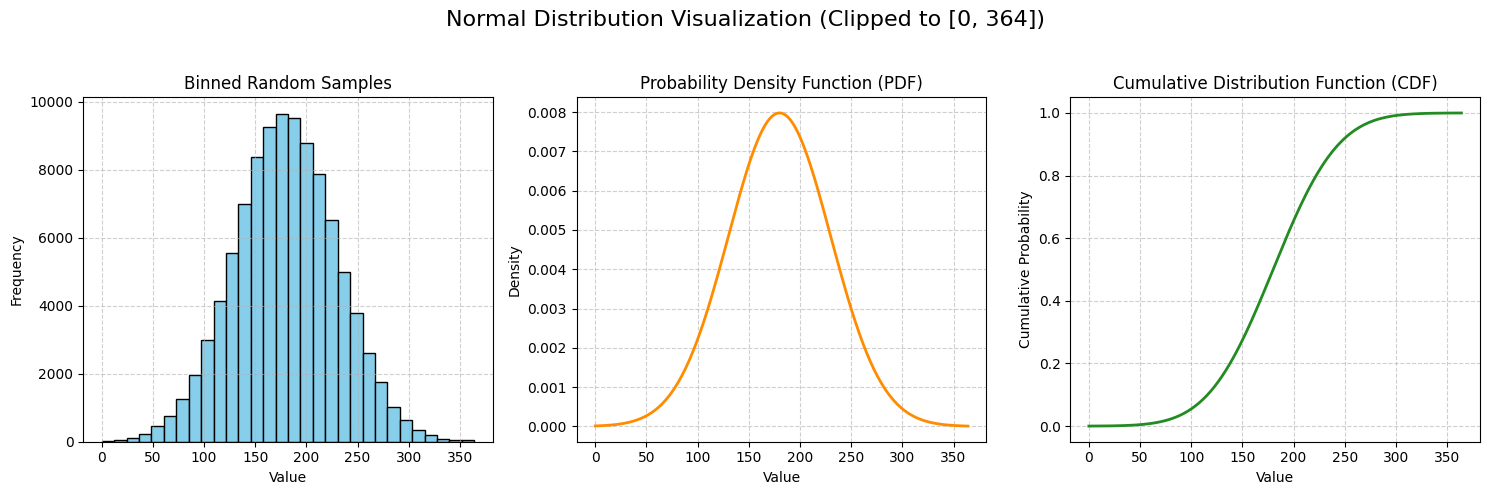

In [5]:

# Parameters for the normal distribution
mean = 180
std_dev = 50
N = 100000  # Number of samples

# Generate random samples from a normal distribution and clip values to [0, 364]
samples = np.clip(np.random.normal(mean, std_dev, size=N), 0, 364)

# Set up subplots with a common title and tight layout
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Normal Distribution Visualization (Clipped to [0, 364])", fontsize=16)

# Subplot 1: Histogram of random samples
axs[0].set_title("Binned Random Samples", fontsize=12)
axs[0].hist(samples, bins=30, color="skyblue", edgecolor="black")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Frequency")
axs[0].grid(True, linestyle="--", alpha=0.6)

# Subplot 2: Probability Density Function (PDF)
x_loc = np.linspace(0, 364, 200)
axs[1].set_title("Probability Density Function (PDF)", fontsize=12)
axs[1].plot(x_loc, norm.pdf(x_loc, mean, std_dev), color="darkorange", lw=2)
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Density")
axs[1].grid(True, linestyle="--", alpha=0.6)

# Subplot 3: Cumulative Distribution Function (CDF)
axs[2].set_title("Cumulative Distribution Function (CDF)", fontsize=12)
axs[2].plot(x_loc, norm.cdf(x_loc, mean, std_dev), color="forestgreen", lw=2)
axs[2].set_xlabel("Value")
axs[2].set_ylabel("Cumulative Probability")
axs[2].grid(True, linestyle="--", alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

100%|██████████| 99/99 [00:00<00:00, 107.63it/s]


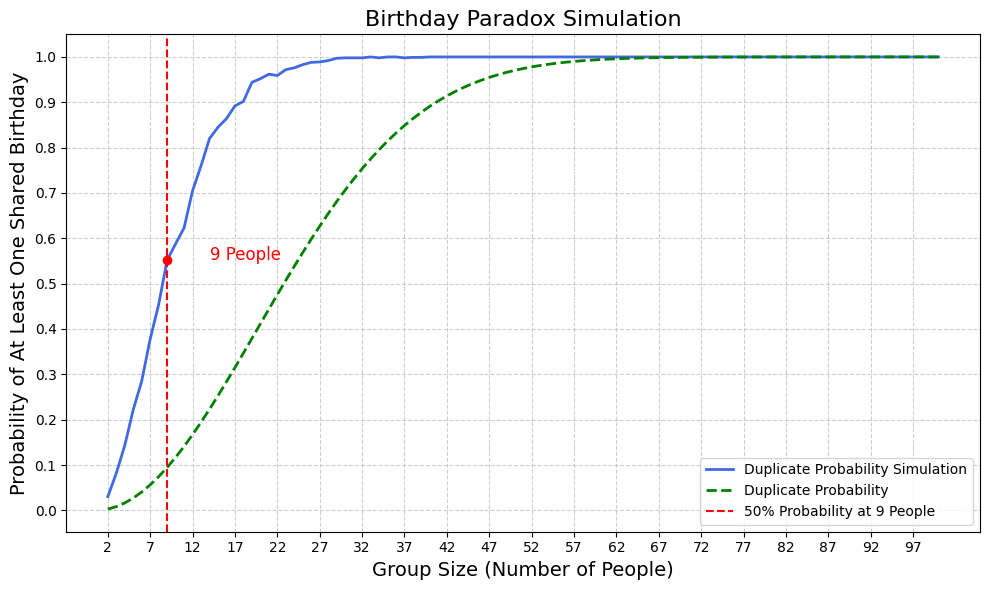

In [6]:
iteration = 1000
Nperson = 100

duplicate_rate = []
# Simulate the Birthday Paradox for group sizes 2 to 99
for iGroupSize in tqdm(range(2, Nperson+1)):
    duplicates_counter = 0
    for i in range(iteration):
        # birthdays = np.random.randint(365, size=iGroupSize)  # Randomize group birthdays (0-364)
        birthdays = np.clip(np.random.normal(180, 150, size=iGroupSize), 0, 364).astype(int)  # Randomize group birthdays (0-364)
        
        
        uniques, counts = np.unique(birthdays, return_counts=True)  # Unique birthdays and their counts
        duplicates = uniques[counts > 1]  # Find duplicate birthdays
        duplicates_counter += np.size(duplicates) > 0  # Count if duplicates exist

    duplicate_rate.append(duplicates_counter / iteration)  # Probability of a duplicate in this group size



# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, Nperson+1), duplicate_rate, color='royalblue', lw=2, label="Duplicate Probability Simulation")
plt.plot(range(2, Nperson+1), Pb, color='green', linestyle='--', lw=2, label="Duplicate Probability")

# Highlight where the probability exceeds 50%
threshold_x = np.argmax(np.array(duplicate_rate) > 0.5) + 2  # Find the group size where P > 0.5
threshold_y = duplicate_rate[threshold_x - 2]  # Corresponding probability

plt.axvline(x=threshold_x, color='red', linestyle='--', label=f"50% Probability at {threshold_x} People")
plt.scatter(threshold_x, threshold_y, color='red', zorder=5)  # Add point on the curve

# Annotate the plot with the x-value
plt.text(threshold_x + 5, threshold_y, f'{int(threshold_x)} People', color='red', fontsize=12, ha='left')


# Labels and title
plt.xlabel('Group Size (Number of People)', fontsize=14)
plt.ylabel('Probability of At Least One Shared Birthday', fontsize=14)
plt.title('Birthday Paradox Simulation', fontsize=16)

# Grid and ticks for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(2, 101, 5))  # Adjust x-ticks for better clarity
plt.yticks(np.arange(0, 1.1, 0.1))  # Adjust y-ticks

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

and plot results